In [1]:
import numpy
import scipy.special

In [2]:
class Neural_Network:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        print("Input Nodes: ", self.inodes, "Hidden Nodes: ", self.hnodes, "Output Nodes: ", self.onodes)
        self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        self.who = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)
        
        print("Matrix 1: \n", self.wih)
        print("Matrix 2: \n", self.who)
        
        self.lr = learningrate
        
        # activation function
        self.activation_function = lambda x: scipy.special.expit(x) 
        
        pass    
    
    def train(self,inputs_list, targets_list):
        
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self.lr * numpy.dot(output_errors * final_outputs * (1.0 - final_outputs), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot(hidden_errors * hidden_outputs * (1.0 - hidden_outputs), numpy.transpose(inputs))
        
        pass
    
    def query(self, inputs_list):
        
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        
        

In [4]:
n = Neural_Network(inputnodes=3, hiddennodes=10, outputnodes=8, learningrate=0.2)

Input Nodes:  3 Hidden Nodes:  10 Output Nodes:  8
Matrix 1: 
 [[ 0.15862307 -0.2527978   0.41512219]
 [ 0.13306577 -0.16094363 -0.40430267]
 [-0.45624524 -0.2604724  -0.37395364]
 [-0.11866689  0.29429898 -0.0966027 ]
 [ 0.48875799  0.26353907  0.27855937]
 [ 0.07535828  0.08121898 -0.24640664]
 [-0.4728748   0.2351381  -0.33267127]
 [ 0.3713831  -0.11208316  0.21921619]
 [-0.45485176  0.06961492 -0.12489293]
 [-0.0714532   0.47600451 -0.09415805]]
Matrix 2: 
 [[ 0.26382823 -0.09295965 -0.33126157 -0.06788512 -0.37030011  0.38360914
  -0.24086268  0.26982706 -0.18771579  0.15301381]
 [-0.28318723 -0.19659429  0.41819829 -0.07969324 -0.2934641  -0.1620851
  -0.35755194 -0.11854208  0.44777294 -0.03349741]
 [ 0.33928273 -0.38984886  0.29617232  0.15097121  0.10538425 -0.19893899
   0.24006862  0.42357981 -0.43530115  0.2247495 ]
 [-0.25981565  0.11639159  0.07511536 -0.22426952 -0.24454924  0.41185054
  -0.01934891  0.04534843  0.45720348  0.04056509]
 [-0.17089741  0.01720497 -0.378053

In [5]:
n.query([0.1, 0.2, 0.5])

array([[0.48056477],
       [0.40769748],
       [0.60350897],
       [0.53579094],
       [0.49879076],
       [0.58043683],
       [0.41037299],
       [0.53592184]])

In [6]:
training_data_file = open("mnist_dataset/mnist_train_100.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [7]:
len(training_data_list)

100

In [8]:
example = training_data_list[0]

In [9]:
example

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [10]:
all_values_of_example_in_string = example.split(",")

In [11]:
all_values_of_example_in_string

['5',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '3',
 '18',
 '18',
 '18',
 '126',
 '136',
 '175',
 '26',
 '166',
 '255',
 '247',


In [12]:
all_values_of_example = numpy.asfarray(all_values_of_example_in_string)

In [13]:
all_values_of_example

array([  5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [14]:
label = all_values_of_example[0]

In [15]:
print("label: ", label)

label:  5.0


In [16]:
picture = all_values_of_example[1:]#1 - 785 (784)

In [17]:
picture.shape

(784,)

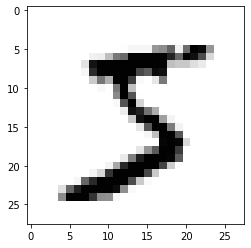

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(picture.reshape(28, 28), cmap="Greys", interpolation="none")

In [19]:
picture

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [20]:
n = Neural_Network(inputnodes=784, hiddennodes=200, outputnodes=10, learningrate=0.1)

Input Nodes:  784 Hidden Nodes:  200 Output Nodes:  10
Matrix 1: 
 [[ 0.30936015 -0.04351874  0.23070899 ... -0.36902376 -0.48039703
   0.31003254]
 [-0.46546049 -0.05331711 -0.18948686 ...  0.17592288  0.39021193
   0.41352509]
 [-0.07733793  0.44705052 -0.45599242 ...  0.29407638  0.0681289
  -0.00689412]
 ...
 [-0.44374633  0.47138776  0.06079122 ... -0.45464867 -0.2078181
  -0.17316709]
 [-0.29573084 -0.31595285  0.42026671 ...  0.46550209 -0.19726094
   0.10730661]
 [ 0.12787447  0.43997038  0.36474025 ...  0.23446555  0.3239681
  -0.04367504]]
Matrix 2: 
 [[-1.99026994e-01  4.79460728e-01 -2.75470312e-01 ...  2.63104599e-01
   3.91718787e-01  2.56077991e-01]
 [ 2.74998092e-02  4.28465446e-01 -3.25437312e-04 ...  3.06364483e-01
  -2.43342200e-01  3.66738673e-01]
 [ 1.36819988e-01  7.88506599e-02  4.67047277e-02 ...  1.57985614e-01
   3.40319295e-02 -3.17693378e-01]
 ...
 [-7.58830398e-02  3.36671850e-02  1.49986381e-01 ...  1.67326063e-01
   3.49580835e-01 -4.94155246e-01]
 [ 4.83

In [21]:
epochs = 10
output_nodes = 10
for e in range(epochs):
    print('Epoch: ', e + 1)
    
    for record in training_data_list:
        
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10


In [22]:
n.who

array([[-0.20375176,  0.49510065, -0.3374017 , ...,  0.27094872,
         0.39602021,  0.20062687],
       [ 0.02880548,  0.36930651, -0.02633553, ...,  0.32079852,
        -0.24578836,  0.38374218],
       [ 0.09231359,  0.06611334, -0.01118132, ...,  0.17512576,
         0.01230982, -0.33593227],
       ...,
       [-0.07016594,  0.03697465,  0.19440627, ...,  0.18404705,
         0.40241482, -0.48985155],
       [ 0.50680035,  0.48139951,  0.04945462, ..., -0.22626051,
         0.29563407, -0.13016172],
       [-0.60271822, -0.21258041,  0.31573623, ..., -0.14905162,
        -0.10158203,  0.51118672]])

In [23]:
test_data_file = open("mnist_dataset/mnist_test_10.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

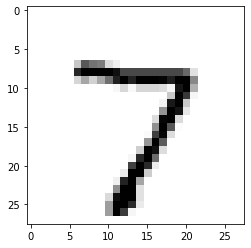

In [24]:
record = test_data_list[0]
all_values = record.split(',')

picture = numpy.asfarray(all_values[1:])
plt.imshow(picture.reshape(28,28), cmap='Greys', interpolation='None')


In [25]:
input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

In [26]:
inputs

array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   

In [27]:
n.query(inputs)

array([[0.00312441],
       [0.93514153],
       [0.03564987],
       [0.00872337],
       [0.08167319],
       [0.02504149],
       [0.0018069 ],
       [0.04955031],
       [0.01127929],
       [0.01055065]])

In [28]:
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    
    correct_label = int(all_values[0])
    
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    outputs = n.query(inputs)
    
    label = numpy.argmax(outputs)
    
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        
scorecard_array = numpy.asarray(scorecard)
print('Performace: ', scorecard_array.sum() / scorecard_array.size)

Performace:  0.7


In [29]:
import glob
import imageio

In [32]:
our_own_dataset = []
for image_file_name in glob.glob('my_own_images/2828_my_own_?.png'):
    label = int(image_file_name[-5:-4])
    print('loading....', image_file_name)
    
    img_array = imageio.imread(image_file_name, as_gray=True)
    img_data = 255.0 - img_array.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    
    record = numpy.append(label, img_data)
    our_own_dataset.append(record)

loading.... my_own_images\2828_my_own_2.png
loading.... my_own_images\2828_my_own_3.png
loading.... my_own_images\2828_my_own_4.png
loading.... my_own_images\2828_my_own_5.png
loading.... my_own_images\2828_my_own_6.png


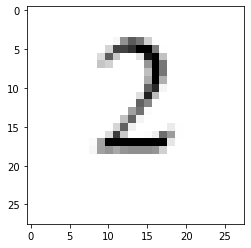

In [33]:
item = 0
plt.imshow(our_own_dataset[item][1:].reshape(28, 28), cmap='Greys', interpolation='None')

[[0.16305353]
 [0.03436619]
 [0.18019927]
 [0.06171174]
 [0.06359631]
 [0.10137703]
 [0.12137268]
 [0.30381626]
 [0.00617606]
 [0.00171014]]
Network says:  7


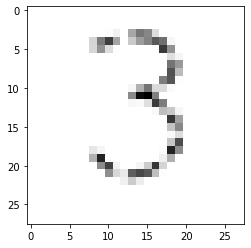

In [36]:
item = 1
plt.imshow(our_own_dataset[item][1:].reshape(28, 28), cmap='Greys', interpolation='None')

correct_label = our_own_dataset[item][0]
inputs = our_own_dataset[item][1:]

outputs = n.query(inputs)
print(outputs)

label = numpy.argmax(outputs)
print('Network says: ', label)

[[4.80343375e-04]
 [1.08292523e-02]
 [1.94733091e-02]
 [1.08374504e-01]
 [9.74974788e-01]
 [3.15437862e-02]
 [6.08246114e-03]
 [1.55456934e-02]
 [6.45489686e-03]
 [4.12265431e-02]]
Network says:  4


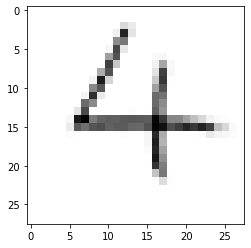

In [37]:
item = 2
plt.imshow(our_own_dataset[item][1:].reshape(28, 28), cmap='Greys', interpolation='None')

correct_label = our_own_dataset[item][0]
inputs = our_own_dataset[item][1:]

outputs = n.query(inputs)
print(outputs)

label = numpy.argmax(outputs)
print('Network says: ', label)

[[0.17598135]
 [0.03658019]
 [0.08794332]
 [0.02626822]
 [0.11440862]
 [0.0548468 ]
 [0.19341927]
 [0.27349069]
 [0.02304935]
 [0.06749673]]
Network says:  7


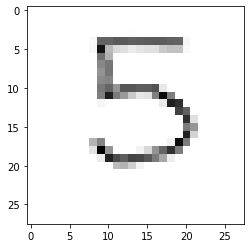

In [40]:
item = 3
plt.imshow(our_own_dataset[item][1:].reshape(28, 28), cmap='Greys', interpolation='None')

correct_label = our_own_dataset[item][0]
inputs = our_own_dataset[item][1:]

outputs = n.query(inputs)
print(outputs)

label = numpy.argmax(outputs)
print('Network says: ', label)

[[0.25381006]
 [0.00774162]
 [0.02900528]
 [0.02244704]
 [0.03145112]
 [0.02422517]
 [0.37303539]
 [0.03528589]
 [0.00295775]
 [0.05995747]]
Network says:  6


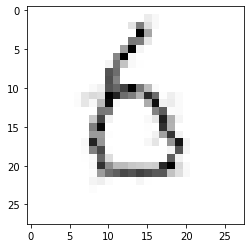

In [41]:
item = 4
plt.imshow(our_own_dataset[item][1:].reshape(28, 28), cmap='Greys', interpolation='None')

correct_label = our_own_dataset[item][0]
inputs = our_own_dataset[item][1:]

outputs = n.query(inputs)
print(outputs)

label = numpy.argmax(outputs)
print('Network says: ', label)